In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [ ]:
#%cd /content/drive/My Drive/BT4222/Final/datasets
md = pd.read_csv('masterdata.csv')

In [ ]:
md = md.drop(columns=['category', 'label', 'text_', 'lang', 'cleaned_text']) # drop cleaned_text since unlemmatised performed better
md.head()

In [ ]:
# Split train test sets
X = md.drop(columns=['target'], axis = 1)
y = pd.DataFrame(md.loc[:,'target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size = 0.2) #20% test

# Logistic Regression (CountVectorizer)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()

X_train_dtm_bow = bow.fit_transform(X_train['clean_text'])
X_test_dtm_bow = bow.transform(X_test['clean_text'])

In [ ]:
X_train_others = X_train.drop('clean_text', axis=1).values
X_test_others = X_test.drop('clean_text', axis=1).values

In [ ]:
B_train = X_train_dtm_bow.toarray()
B_test = X_test_dtm_bow.toarray()

In [ ]:
X_train_dtm_bow_new = np.hstack((X_train_others, B_train))
X_test_dtm_bow_new = np.hstack((X_test_others, B_test))

#normalizing data
from sklearn import preprocessing
X_train_dtm_bow_new = preprocessing.normalize(X_train_dtm_bow_new, norm='l2')
X_test_dtm_bow_new = preprocessing.normalize(X_test_dtm_bow_new, norm='l2')

In [ ]:
from sklearn import linear_model, model_selection, metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot

estimator_bow = linear_model.LogisticRegression(max_iter = 500) #might need to include max_iter = 1000 or something cos reached max iterations = 100  
estimator_bow.fit(X_train_dtm_bow_new, y_train.values.ravel())

y_train_pred_class_bow = estimator_bow.predict(X_train_dtm_bow_new)
y_test_pred_class_bow = estimator_bow.predict(X_test_dtm_bow_new)
print("train accuracy using BoW vectorizer:", metrics.accuracy_score(y_train, y_train_pred_class_bow))
print("test accuracy using BoW vectorizer:", metrics.accuracy_score(y_test, y_test_pred_class_bow))
print("precision using BoW vectorizer: ", metrics.precision_score(y_test, y_test_pred_class_bow))
print("recall using BoW vectorizer: ", metrics.recall_score(y_test, y_test_pred_class_bow))


train accuracy using BoW vectorizer: 0.8728359503236396
test accuracy using BoW vectorizer: 0.8677071720549981
precision using BoW vectorizer:  0.8766913454174113
recall using BoW vectorizer:  0.8544414033341627


CountVectorizer: ROC AUC=0.925


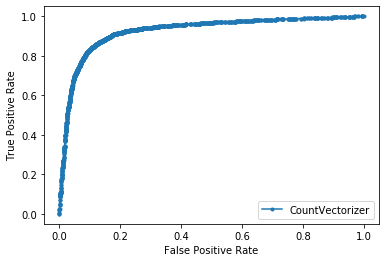

In [ ]:
#predict probabilities
probs_bow = estimator_bow.predict_proba(X_test_dtm_bow_new)
probs_bow = probs_bow[:, 1]
auc_bow = roc_auc_score(y_test, probs_bow)
print('CountVectorizer: ROC AUC=%.3f' % (auc_bow))

#plotting ROC curve
bow_fp, bow_tp, _ = roc_curve(y_test, probs_bow)
pyplot.plot(bow_fp, bow_tp, marker='.', label='CountVectorizer')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

CountVectorizer: f1=0.865 auc=0.918


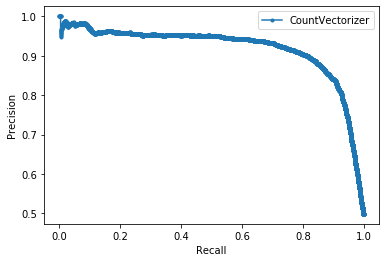

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

bow_prec, bow_recall, _ = precision_recall_curve(y_test, probs_bow)
bow_f1, bow_auc = f1_score(y_test, y_test_pred_class_bow), auc(bow_recall, bow_prec)
print('CountVectorizer: f1=%.3f auc=%.3f' % (bow_f1, bow_auc))

pyplot.plot(bow_recall, bow_prec, marker='.', label='CountVectorizer')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Logistic Regression (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

X_train_dtm_tfidf = tfidf.fit_transform(X_train['clean_text'])
X_test_dtm_tfidf = tfidf.transform(X_test['clean_text'])

In [ ]:
X_train_others = X_train.drop('clean_text', axis=1)
X_test_others = X_test.drop('clean_text', axis=1)

In [ ]:
B_train_tfidf = X_train_dtm_tfidf.toarray()
B_test_tfidf = X_test_dtm_tfidf.toarray()

In [ ]:
X_train_dtm_tfidf_new = np.hstack((X_train_others, B_train_tfidf))
X_test_dtm_tfidf_new = np.hstack((X_test_others, B_test_tfidf))

#normalizing data
from sklearn import preprocessing
X_train_dtm_tfidf_new = preprocessing.normalize(X_train_dtm_tfidf_new, norm='l2')
X_test_dtm_tfidf_new = preprocessing.normalize(X_test_dtm_tfidf_new, norm='l2')

train accuracy using TF-IDF vectorizer: 0.7683111895692031
test accuracy using TF-IDF vectorizer: 0.7707172054998142
precision using TF-IDF vectorizer:  0.8589403973509934
recall using TF-IDF vectorizer:  0.645434187608858
TF-IDF: ROC AUC=0.787


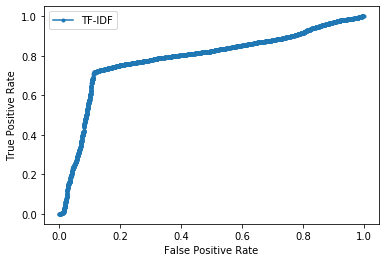

In [ ]:
from sklearn import linear_model, model_selection, metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot

estimator_tfidf = linear_model.LogisticRegression(max_iter = 500) #might need to include max_iter = 1000 or something cos reached max iterations = 100
estimator_tfidf.fit(X_train_dtm_tfidf_new, y_train.values.ravel())

y_train_pred_class_tfidf = estimator_tfidf.predict(X_train_dtm_tfidf_new)
y_test_pred_class_tfidf = estimator_tfidf.predict(X_test_dtm_tfidf_new)
print("train accuracy using TF-IDF vectorizer:", metrics.accuracy_score(y_train, y_train_pred_class_tfidf))
print("test accuracy using TF-IDF vectorizer:", metrics.accuracy_score(y_test, y_test_pred_class_tfidf))
print("precision using TF-IDF vectorizer: ", metrics.precision_score(y_test, y_test_pred_class_tfidf))
print("recall using TF-IDF vectorizer: ", metrics.recall_score(y_test, y_test_pred_class_tfidf))

#predict probabilities
probs_tfidf = estimator_tfidf.predict_proba(X_test_dtm_tfidf_new)
probs_tfidf = probs_tfidf[:, 1]
auc_tfidf = roc_auc_score(y_test, probs_tfidf)
print('TF-IDF: ROC AUC=%.3f' % (auc_tfidf))

#plotting ROC curve
tfidf_fp, tfidf_tp, _ = roc_curve(y_test, probs_tfidf)
pyplot.plot(tfidf_fp, tfidf_tp, marker='.', label='TF-IDF')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

TF-IDF: f1=0.737 auc=0.760


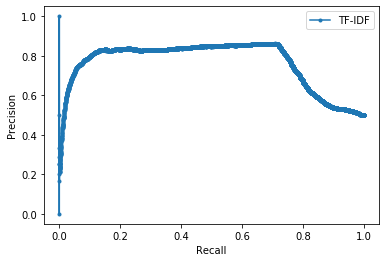

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

tfidf_prec, tfidf_recall, _ = precision_recall_curve(y_test, probs_tfidf)
tfidf_f1, tfidf_auc = f1_score(y_test, y_test_pred_class_tfidf), auc(tfidf_recall, tfidf_prec)
print('TF-IDF: f1=%.3f auc=%.3f' % (tfidf_f1, tfidf_auc))

pyplot.plot(tfidf_recall, tfidf_prec, marker='.', label='TF-IDF')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Summary of Metrics

In [ ]:
print("train accuracy using BoW vectorizer:", metrics.accuracy_score(y_train, y_train_pred_class_bow))
print("train accuracy using TF-IDF vectorizer:", metrics.accuracy_score(y_train, y_train_pred_class_tfidf))
print('')
print("test accuracy using BoW vectorizer:", metrics.accuracy_score(y_test, y_test_pred_class_bow))
print("test accuracy using TF-IDF vectorizer:", metrics.accuracy_score(y_test, y_test_pred_class_tfidf))
print('')
print("precision using BoW vectorizer: ", metrics.precision_score(y_test, y_test_pred_class_bow))
print("precision using TF-IDF vectorizer: ", metrics.precision_score(y_test, y_test_pred_class_tfidf))
print('')
print("recall using BoW vectorizer: ", metrics.recall_score(y_test, y_test_pred_class_bow))
print("recall using TF-IDF vectorizer: ", metrics.recall_score(y_test, y_test_pred_class_tfidf))
print('')
print('CountVectorizer: ROC AUC=%.3f' % (auc_bow))
print('TF-IDF: ROC AUC=%.3f' % (auc_tfidf))


train accuracy using BoW vectorizer: 0.8728359503236396
train accuracy using TF-IDF vectorizer: 0.7683111895692031

test accuracy using BoW vectorizer: 0.8677071720549981
test accuracy using TF-IDF vectorizer: 0.7707172054998142

precision using BoW vectorizer:  0.8766913454174113
precision using TF-IDF vectorizer:  0.8589403973509934

recall using BoW vectorizer:  0.8544414033341627
recall using TF-IDF vectorizer:  0.645434187608858

CountVectorizer: ROC AUC=0.925
TF-IDF: ROC AUC=0.787


# Feature Selection (CountVectorizer)

**Logistic Regression Feature Selection**
CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=min(20000, X_train_dtm_bow_new.shape[1]))
selector.fit(X_train_dtm_bow_new, y_train.values.ravel())
x_train_bow = selector.transform(X_train_dtm_bow_new).astype('float32') #final training set for Log Reg
x_test_bow = selector.transform(X_test_dtm_bow_new).astype('float32') #final training set for Log Reg

In [ ]:
x_train_bow.toarray()

In [ ]:
from sklearn import linear_model, model_selection, metrics
estimator = linear_model.LogisticRegression(max_iter = 500) 
estimator.fit(x_train_bow, y_train.values.ravel())

y_train_pred_class_bow = estimator.predict(x_train_bow)
y_test_pred_class_bow = estimator.predict(x_test_bow)
print("train accuracy using BoW vectorizer:", metrics.accuracy_score(y_train, y_train_pred_class_bow))
print("test accuracy using BoW vectorizer:", metrics.accuracy_score(y_test, y_test_pred_class_bow))

train accuracy using BoW vectorizer: 0.8716590789432934
test accuracy using BoW vectorizer: 0.8669639539204756


# Feature Selection (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=min(20000, X_train_dtm_tfidf_new.shape[1]))
selector.fit(X_train_dtm_tfidf_new, y_train.values.ravel())
x_train_tfidf = selector.transform(X_train_dtm_tfidf_new).astype('float32') #final training set for Log Reg
x_test_tfidf = selector.transform(X_test_dtm_tfidf_new).astype('float32') #final training set for Log Reg

In [ ]:
from sklearn import linear_model, model_selection, metrics
estimator = linear_model.LogisticRegression(max_iter = 500) 
estimator.fit(x_train_tfidf, y_train.values.ravel())

y_train_pred_class_tfidf = estimator.predict(x_train_tfidf)
y_test_pred_class_tfidf = estimator.predict(x_test_tfidf)
print("train accuracy using TF-IDF vectorizer:", metrics.accuracy_score(y_train, y_train_pred_class_tfidf))
print("test accuracy using TF-IDF vectorizer:", metrics.accuracy_score(y_test, y_test_pred_class_tfidf))

train accuracy using TF-IDF vectorizer: 0.7799560221747345
test accuracy using TF-IDF vectorizer: 0.7837235228539576


# Hyperparameter Tuning

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import linear_model, model_selection, metrics

lst = []

for x in range (5, 11):
    # instantiate vectorizer
    cv_optimal = CountVectorizer(min_df=x, ngram_range=(1,2))
    
    X_train_dtm_cv_optimal= cv_optimal.fit_transform(X_train['clean_text'])
    X_train_stack = X_train.drop(columns=['clean_text']).values
    X_train_dtm_cv_optimal= np.hstack((X_train_dtm_cv_optimal.toarray(), X_train_stack))
    
    X_test_dtm_cv_optimal = cv_optimal.transform(X_test['clean_text'])
    X_test_stack = X_test.drop(columns=['clean_text']).values
    X_test_dtm_cv_optimal = np.hstack((X_test_dtm_cv_optimal.toarray(), X_test_stack))
    
    from sklearn import preprocessing
    X_train_dtm_cv_optimal = preprocessing.normalize(X_train_dtm_cv_optimal, norm='l2')
    X_test_dtm_cv_optimal = preprocessing.normalize(X_test_dtm_cv_optimal, norm='l2')
    
    # select at least 20000 features that scored the best (feature extraction)
    selector_cv_optimal = SelectKBest(f_classif, k=min(20000, X_train_dtm_cv_optimal.shape[1]))
    selector_cv_optimal.fit(X_train_dtm_cv_optimal, y_train.values.ravel())
    
    # final X_train_dtm for LR
    X_train_cv_fs_optimal = selector_cv_optimal.transform(X_train_dtm_cv_optimal) 
    # final X_test_dtm for LR
    X_test_cv_fs_optimal = selector_cv_optimal.transform(X_test_dtm_cv_optimal) 

    # instantiate a Multinomial Naive Bayes model with optimal parameters
    lr_optimal = linear_model.LogisticRegression(max_iter = 500)
    
    # train the model
    %time lr_optimal.fit(X_train_cv_fs_optimal, y_train.values.ravel())
    
    # make class predictions for X_test_dtm_nb
    y_train_pred_optimal = lr_optimal.predict(X_train_cv_fs_optimal)
    y_pred_class_optimal = lr_optimal.predict(X_test_cv_fs_optimal)
    y_pred_prob_optimal = lr_optimal.predict_proba(X_test_cv_fs_optimal)[:, 1]
    
    # Get the test accuracy
    lst.append(tuple([x, metrics.accuracy_score(y_test, y_pred_class_optimal)]))

CPU times: user 4min 54s, sys: 10min 39s, total: 15min 34s
Wall time: 6min 47s
CPU times: user 5min 8s, sys: 10min 55s, total: 16min 3s
Wall time: 7min 2s
CPU times: user 6min 51s, sys: 14min 58s, total: 21min 50s
Wall time: 9min 25s
CPU times: user 6min 1s, sys: 13min 10s, total: 19min 12s
Wall time: 8min 20s
CPU times: user 4min 42s, sys: 10min 6s, total: 14min 49s
Wall time: 6min 28s
CPU times: user 5min 28s, sys: 12min 1s, total: 17min 30s
Wall time: 7min 35s


In [ ]:
lst

[(5, 0.8854205375944506),
 (6, 0.8857921466617119),
 (7, 0.8872785829307569),
 (8, 0.8876501919980181),
 (9, 0.8877740616871052),
 (10, 0.8883934101325406)]

# Optimal Model Testing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(ngram_range=(1,2), min_df=10)

X_train_dtm_bow = bow.fit_transform(X_train['clean_text'])
X_test_dtm_bow = bow.transform(X_test['clean_text'])

X_train_others = X_train.drop('clean_text', axis=1).values
X_test_others = X_test.drop('clean_text', axis=1).values

B_train = X_train_dtm_bow.toarray()
B_test = X_test_dtm_bow.toarray()

X_train_dtm_bow_new = np.hstack((X_train_others, B_train))
X_test_dtm_bow_new = np.hstack((X_test_others, B_test))

#normalizing data
from sklearn import preprocessing
X_train_dtm_bow_new = preprocessing.normalize(X_train_dtm_bow_new, norm='l2')
X_test_dtm_bow_new = preprocessing.normalize(X_test_dtm_bow_new, norm='l2')

In [ ]:
from sklearn import linear_model, model_selection, metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot

estimator_bow = linear_model.LogisticRegression(max_iter = 500)
estimator_bow.fit(X_train_dtm_bow_new, y_train.values.ravel())

y_train_pred_class_bow = estimator_bow.predict(X_train_dtm_bow_new)
y_test_pred_class_bow = estimator_bow.predict(X_test_dtm_bow_new)
print("train accuracy using optimal BoW vectorizer:", metrics.accuracy_score(y_train, y_train_pred_class_bow))
print("test accuracy using optimal BoW vectorizer:", metrics.accuracy_score(y_test, y_test_pred_class_bow))
print("precision using optimal BoW vectorizer: ", metrics.precision_score(y_test, y_test_pred_class_bow))
print("recall using optimal BoW vectorizer: ", metrics.recall_score(y_test, y_test_pred_class_bow))

train accuracy using optimal BoW vectorizer: 0.8962185264331506
test accuracy using optimal BoW vectorizer: 0.8880218010652793
precision using optimal BoW vectorizer:  0.8992566008715714
recall using optimal BoW vectorizer:  0.8728539437671062


CountVectorizer: ROC AUC=0.943


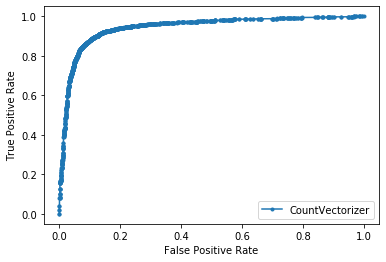

In [ ]:
#predict probabilities
probs_bow = estimator_bow.predict_proba(X_test_dtm_bow_new)
probs_bow = probs_bow[:, 1]
auc_bow = roc_auc_score(y_test, probs_bow)
print('CountVectorizer: ROC AUC=%.3f' % (auc_bow))

#plotting ROC curve
bow_fp, bow_tp, _ = roc_curve(y_test, probs_bow)
pyplot.plot(bow_fp, bow_tp, marker='.', label='CountVectorizer')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()